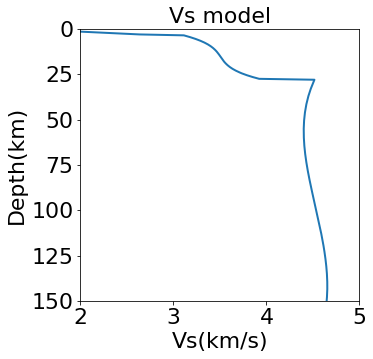

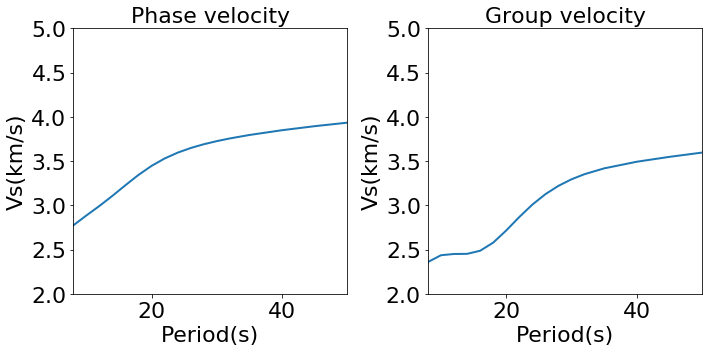

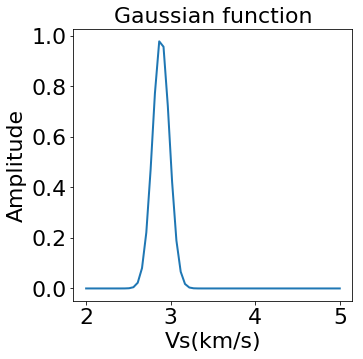

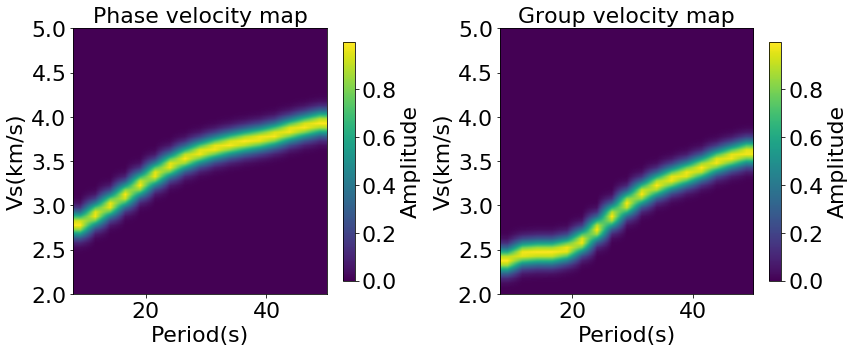

In [48]:
#!/usr/bin/env python3  
# -*- coding: utf-8 -*-  
"""  
 @Author: HUJING
 @Time:6/13/18 9:15 AM 2018
 @Email: jhsa26@mail.ustc.edu.cn
 @Site:jhsa26.github.io
 """
import numpy as np
import matplotlib.pyplot as plt
import os

def gaussian_map(vel,vel_axis,radius=0.1):
    rows  = vel_axis.shape[0]
    cols  = vel.shape[0]
    vel_map = np.zeros((rows,cols))
    for i in range(cols):
        vel_temp = vel[i]
        x_gaussian = gaussian(vel_temp, vel_axis, r=radius)
        vel_map[:, i] = x_gaussian
    return vel_map

def gaussian(vel,vel_axis,r=0.1):
    x_gaussian = np.exp(-((vel_axis-vel)**2)/(2*r**2))
    return x_gaussian


font={"size":22}
filepath_disp_training = './disp_out/'
filepath_vs_training =  './Vs_GroundTruth_0.5km/'
r=0.1

vel_axis = np.linspace(2,5,num=60)

pos='28.00_260.00'
temp  = np.loadtxt('./disp_out/1_'+pos+'.txt')
vel_p  = temp[:,1]
vel_g  = temp[:,2]
freqs  = temp[:,0]
vs_syn=np.loadtxt('./Vs_GroundTruth_0.5km/'+pos+'.txt')
depths = vs_syn[:,0]
vs = vs_syn[:,1]
ph = vel_p[:]
gr = vel_g[:]
vel_map_p= gaussian_map(ph,vel_axis,radius=r)
vel_map_g= gaussian_map(gr,vel_axis,radius=r)
vs_map_syn = gaussian_map(vs,vel_axis,radius=r)
pg=vel_map_p+vel_map_g;


fig,axes = plt.subplots(1,1,figsize=(5,5))
ax= axes
ax.plot(vs,depths,"-",linewidth=2)
ax.set_ylabel('Depth(km)',fontsize=font["size"])
ax.set_xlabel('Vs(km/s)',fontsize=font["size"])
ax.axis([2,5,150,0])
ax.set_title('Vs model',fontsize=font["size"])
ax.tick_params(axis="both",labelsize=font["size"])
plt.savefig("Velocity.eps",dpi=300,bbox_inches="tight")
plt.pause(0.1)
 

fig,axes = plt.subplots(1,2,figsize=(10,5))
ax=axes[0]
ax.plot(freqs,ph,"-",linewidth=2)
ax.axis([8,50,2,5])
ax.set_xlabel('Period(s)',fontsize=font["size"])
ax.set_ylabel('Vs(km/s)',fontsize=font["size"])
ax.set_title('Phase velocity',fontsize=font["size"])
ax.tick_params(axis="both",labelsize=font["size"])
ax=axes[1]
ax.plot(freqs,gr,"-",linewidth=2)
ax.axis([8,50,2,5])
ax.set_xlabel('Period(s)',fontsize=font["size"])
ax.set_ylabel('Vs(km/s)',fontsize=font["size"])
ax.set_title('Group velocity',fontsize=font["size"])
ax.tick_params(axis="both",labelsize=font["size"])
plt.tight_layout()
plt.savefig("curve.eps",dpi=300,bbox_inches="tight")
plt.pause(0.1)


fig,axes = plt.subplots(1,1,figsize=(5,5))
ax= axes
ax.plot(vel_axis,vel_map_p[:,1],"-",linewidth=2)
ax.set_ylabel('Amplitude',fontsize=font["size"])
ax.set_xlabel('Vs(km/s)',fontsize=font["size"])
ax.set_title('Gaussian function',fontsize=font["size"])
ax.tick_params(axis="both",labelsize=font["size"])
plt.savefig("Gaussian.eps",dpi=300,bbox_inches="tight")
plt.pause(0.1)

fig,axes = plt.subplots(1,2,figsize=(12,5))
ax = axes[0]
im=ax.imshow(vel_map_p,aspect='auto',origin='lower',extent=[8,50,2,5],interpolation='bilinear')
ax.set_xlabel('Period(s)',fontsize=font["size"])
ax.set_ylabel('Vs(km/s)',fontsize=font["size"])
ax.set_title('Phase velocity map',fontsize=font["size"])
ax.tick_params(axis="both",labelsize=font["size"])
cbar = fig.colorbar(im, shrink=0.9, ax=ax)
cbar.set_label('Amplitude',fontsize=font["size"])
cbar.ax.tick_params(axis="both",labelsize=font["size"])
ax = axes[1]
im=ax.imshow(vel_map_g,aspect='auto',origin='lower',extent=[8,50,2,5],interpolation='bilinear')
ax.set_xlabel('Period(s)',fontsize=font["size"])
ax.set_ylabel('Vs(km/s)',fontsize=font["size"])
ax.set_title('Group velocity map',fontsize=font["size"])
ax.tick_params(axis="both",labelsize=font["size"])
cbar = fig.colorbar(im, shrink=0.9, ax=ax)
cbar.set_label('Amplitude',fontsize=font["size"])
cbar.ax.tick_params(axis="both",labelsize=font["size"])
plt.tight_layout()
plt.savefig("map.eps",dpi=300,bbox_inches="tight")
plt.pause(0.01)

In [30]:
# plt.subplot(1,4,3)
# plt.imshow(pg,aspect='auto',origin='lower',extent=[8,70,2,5],interpolation='bilinear')
# cb=plt.colorbar()
# plt.clim(0,1)
# plt.xlabel('T(s)')
# plt.ylabel('Vs(km/s)')
# cb.set_label('power')

# plt.subplot(1,3,3)
# plt.imshow(vs_map_syn.T,aspect='auto',origin='upper',extent=[2,5,180,0],interpolation='bilinear')
# cb=plt.colorbar()
# plt.clim(0,1)
# plt.xlabel('Vs(km/s)')
# plt.ylabel('Depth(km)')
# cb.set_label('power')
# plt.title('Ground Truth')
# plt.tight_layout()
# plt.pause(0.01)
# #    
# print(i,len(keys_names))



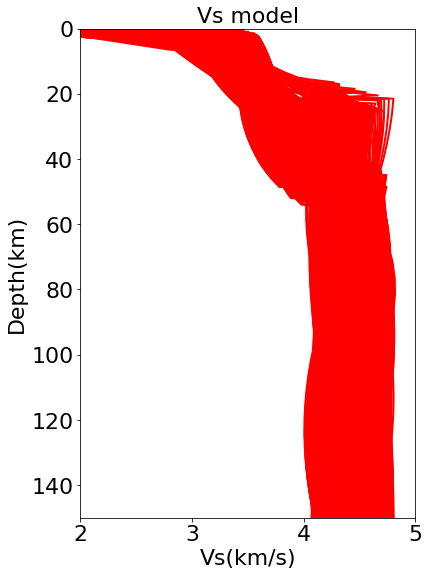

In [5]:
#!/usr/bin/env python3  
# -*- coding: utf-8 -*-  
"""  
 @Author: HUJING
 @Time:6/13/18 9:15 AM 2018
 @Email: jhsa26@mail.ustc.edu.cn
 @Site:jhsa26.github.io
 """
import numpy as np
import matplotlib.pyplot as plt
import os
font={"size":22}
filepath_vs_training =  './Vs_GroundTruth_0.5km/'
vs_dir=os.listdir("./Vs_GroundTruth_0.5km/")
fig,axes = plt.subplots(1,1,figsize=(6,9))
ax= axes
for file in vs_dir[:]:
    vs_syn=np.loadtxt('./Vs_GroundTruth_0.5km/'+file)
    depths = vs_syn[:,0]
    vs = vs_syn[:,1]
    ax.plot(vs,depths,"-r",linewidth=2)
    
ax.set_ylabel('Depth(km)',fontsize=font["size"])
ax.set_xlabel('Vs(km/s)',fontsize=font["size"])
ax.axis([2,5,150,0])
ax.set_title('Vs model',fontsize=font["size"])
ax.tick_params(axis="both",labelsize=font["size"])
plt.savefig("Velocity_usa.eps",dpi=300,bbox_inches="tight")
plt.pause(0.1)

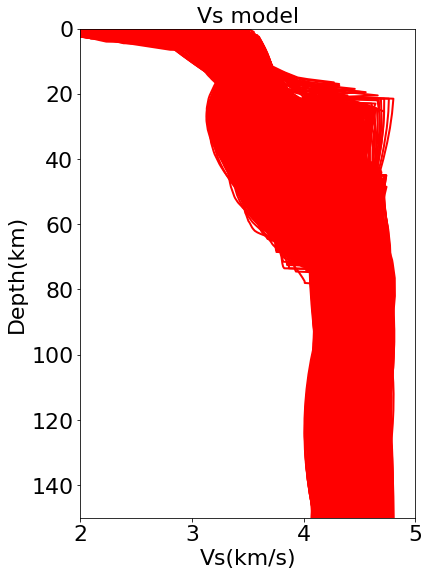

In [6]:
#!/usr/bin/env python3  
# -*- coding: utf-8 -*-  
"""  
 @Author: HUJING
 @Time:6/13/18 9:15 AM 2018
 @Email: jhsa26@mail.ustc.edu.cn
 @Site:jhsa26.github.io
 """
import numpy as np
import matplotlib.pyplot as plt
import os
font={"size":22}
filepath_vs_training =  './vs_curve_usa_tibet/'
vs_dir=os.listdir("./vs_curve_usa_tibet/")
fig,axes = plt.subplots(1,1,figsize=(6,9))
ax= axes
for file in vs_dir[:]:
    vs_syn=np.loadtxt('./vs_curve_usa_tibet/'+file)
    depths = vs_syn[:,0]
    vs = vs_syn[:,1]
    ax.plot(vs,depths,"-r",linewidth=2)
    
ax.set_ylabel('Depth(km)',fontsize=font["size"])
ax.set_xlabel('Vs(km/s)',fontsize=font["size"])
ax.axis([2,5,150,0])
ax.set_title('Vs model',fontsize=font["size"])
ax.tick_params(axis="both",labelsize=font["size"])
plt.savefig("Velocity_usa_tibet.eps",dpi=300,bbox_inches="tight")
plt.pause(0.1)